## Who is the creator of that history? 
This a NLP Project By Raisler Voigt

> The goal is to make a classifier that tells us who is the creator of that story

> I will make TWO Classifiers, this notebook is one of them

> This classifier will have ALL creators (41 in total), data will be missing I guess.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')
df.head(3)

### Testing to see how many NaN we have
<pre>

print('history:' , df['history_text'].isnull().sum())
print('name:' , df['name'].isnull().sum())
print('real name:' , df['real_name'].isnull().sum())
print('powers:', df['powers_text'].isnull().sum())
print(df[['history_text','name', 'real_name', 'powers_text']].count())

</pre>
    
[![3cHn4f.png](https://iili.io/3cHn4f.png)](https://freeimage.host/)

# Discovering...
<pre> 
df.dropna(inplace = True)
print('history:' , df['history_text'].isnull().sum())
print('name:' , df['name'].isnull().sum())
print('real name:' , df['real_name'].isnull().sum())
print('powers:', df['powers_text'].isnull().sum())
print(df[['history_text','name', 'real_name', 'powers_text']].count())

</pre>

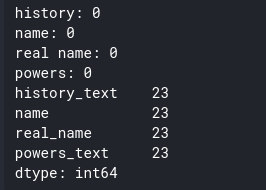

## So, I had an idea

> With so much NaN, I ended up putting names, real names, powers and finally the story in a single column to train the NLP.

> There will be cases where the columns of our features just will have the name, or the powers, What do you think about? Exclude the NaN columns (creator and history_text) or... tell-me (leave a comment or raisler.dev@gmail.com)

In [ ]:
df['powers_text'].fillna('ni', inplace = True)
df['real_name'].fillna('ni', inplace = True)
df['name'].fillna('ni', inplace = True)

In [ ]:
df['name'].isnull().sum()

In [ ]:
cdf = df
cdf['history'] = df['history_text'] + ' Name: ' + df['name'] + ' Real Name: ' + df['real_name'] + ' Powers: ' + df['powers_text']


In [ ]:
cdf['history'][1]

In [ ]:
cdf = cdf[['creator', 'history']]
cdf

In [ ]:
cdf.isnull().sum()

In [ ]:
cdf = cdf.dropna()
cdf.isnull().sum()

# Visualization of our Data

In [ ]:
!pip install wordcloud

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud
text = cdf['history'].sum()
wordcloud = WordCloud(max_font_size=300,background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(cdf,title = 'Creators Train Dataset report', explorative = True)
profile.set_variable("correlations", None)
profile

# Tokenization / Vectorizer / Modeling

> About the stopwords that I used to this project: http://terrier.org/docs/v4.1/javadoc/org/terrier/terms/Stopwords.html

> I'll use only Naive Bayes for modeling


In [ ]:
# Stopwords

stopwords = [] 
f = open('../input/stopwords-terrier/terrier.txt')

for line in f:
   stopwords.append(line)

In [ ]:
stopwords = [x[:-1] for x in stopwords]
print(stopwords)

In [ ]:
stopwords = stopwords.append('ni')

In [ ]:
# Go to vectors!
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = stopwords)

features = cdf['history'].to_numpy()
target = cdf['creator'].to_numpy()

In [ ]:
train = vectorizer.fit_transform(features)
train

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train, target)

In [ ]:
to_pred = ['A boy lost your parents with eight years old, he was train and later became a vigilant in his city!',
           
          '''A baby falls down in a farm, he was born on the planet Krypton and was given the name Kal-El at birth. 
          As a baby, his parents sent him to Earth in a small spaceship
          moments before his planet was destroyed in a natural cataclysm.
          Now he resides in the fictional American city of Metropolis, where he works as a journalist for the Daily Planet.''',
           
        '''A wealthy American business magnate, playboy, and ingenious scientist, 
        he suffers a severe chest injury during a kidnapping. When his captors attempt to force him to build a weapon of mass destruction, 
        he instead creates a mechanized suit of armor to save his life and escape captivity.''',
           
         'The history is simple, He is the Wakanda King'
          ]

# Batman (DC Comics) # Superman (DC Comics) # IronMan (Marvel Comics) # Black Panther (Marvel Comics) 
test = vectorizer.transform(to_pred)
print(clf.predict(test))